<a href="https://colab.research.google.com/github/soohyoen/ToyProject-_-SGRA/blob/main/0908class1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 증폭(이미지 데이터) 전이학습 

## (코렙이 아닌 개발도구로 하시는 것을 권장합니다.)

In [ ]:
# 공유 폴더 dataset 에서 받아주신 후에 
# flowers_init.ipynb 내부에 flowers_init() 함수에서 
# 자신이 가지고 있는 flowers 폴더가 있는 경로를 수정하여 주세요.

# def flowers_init(resolution):
#     path = '/여러분들의 경로/flowers/'

%run flowers_init.ipynb

In [ ]:
# xs는 독립변수 (이미지 데이터)
# ys는 종속변수 (원-핫 벡터 형식, 5가지 종류)
xs, ys = flowers_init([100,100])

In [ ]:
# 데이터 증폭을 위한 라이브러리 불러오기 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## ImageDataGenerator()를 이용해 이미지 추가 생성을 위한 파라미터 
#### • rotation_range : 이미지 회전값
#### • zoom_range : 이미지 일부 확대
#### • shear_range : 이미지 기울기
#### • width_shift_range : 좌우 이동
#### • height_shift_range : 상하 이동
#### • horizontal_flip : 이미지 가로 뒤집기
#### • vertical_filp : 이미지 세로 뒤집기

In [ ]:
image_generator = ImageDataGenerator(rotation_range = 30,
                                     zoom_range = 0.5,
                                     shear_range = 0.5,
                                     width_shift_range = 0.3, 
                                     height_shift_range=0.3,
                                     horizontal_flip = True, 
                                     vertical_flip = True)

In [ ]:
image_generator

### 이미지 데이터의 정규화 (min-max norm)
### 왜 min-max norm 을 사용할까요 ? 

In [ ]:
xs_norm = (xs - 0) / (255.0 - 0)
print(xs_norm.min())
print(xs_norm.max())

0.0
1.0


## 이미지 데이터 셔플링 과정 및 학습과 테스트 데이터 분할 

In [ ]:
# 전체 데이터의 인덱스를 확보 및 셔플링 과정 
shuffle_map = np.arange(xs_norm.shape[0])
np.random.shuffle(shuffle_map)
print(shuffle_map)

[2919 3493 3933 ...   37  977  292]


In [ ]:
# 학습데이터의 비율값을 설정하여 테스트 데이터가 어디부터 
# 시작되는지 확인하는 과정 
train_ratio = 0.8
test_begin_index = int(xs_norm.shape[0] * train_ratio)
print("test_begin_index : ", test_begin_index)

test_begin_index :  3453


In [ ]:
# 독립변수를 학습과 테스트로 나눠주는 과정 
train_x = xs_norm[shuffle_map[:test_begin_index]]
test_x  = xs_norm[shuffle_map[test_begin_index:]]
# 종속변수를 학습과 테스트로 나눠주는 과정 
train_y = ys[shuffle_map[:test_begin_index]]
test_y  = ys[shuffle_map[test_begin_index:]]

print(train_x.shape)
print(test_x.shape)

print(train_y.shape)
print(test_y.shape)

(3453, 100, 100, 3)
(864, 100, 100, 3)
(3453, 5)
(864, 5)


## 데이터 증폭 연습.
## 한 장의 데이터를 100장으로 증폭 시켜 봅니다. 

In [ ]:
augment_size = 100  #데이터 증폭 100장.

x_augment = image_generator.flow(x = np.tile(A = train_x[10].reshape(100*100*3), reps = augment_size).reshape(-1,100,100,3),
                                 # 우린 train_y가 있기 때문에, 딱히 증폭을 시켜줄 필요가 없지만,
                                 # 구색을 맞춰 주겠습니다. 
                                 y = np.zeros(augment_size),
                                 batch_size = augment_size,
                                 # 증폭 과정에서 중복 데이터를 허용할 것인지
                                 shuffle = False).next()[0]
                                 # next()[0] 코드를 작성하게 되면은 증폭된 독립변수만 가져올 수 있습니다.
                                 # next()[1] 코드를 작성하게 되면은 증폭된 종속변수만 가져올 수 있습니다.


In [ ]:
x_augment.shape

(100, 100, 100, 3)

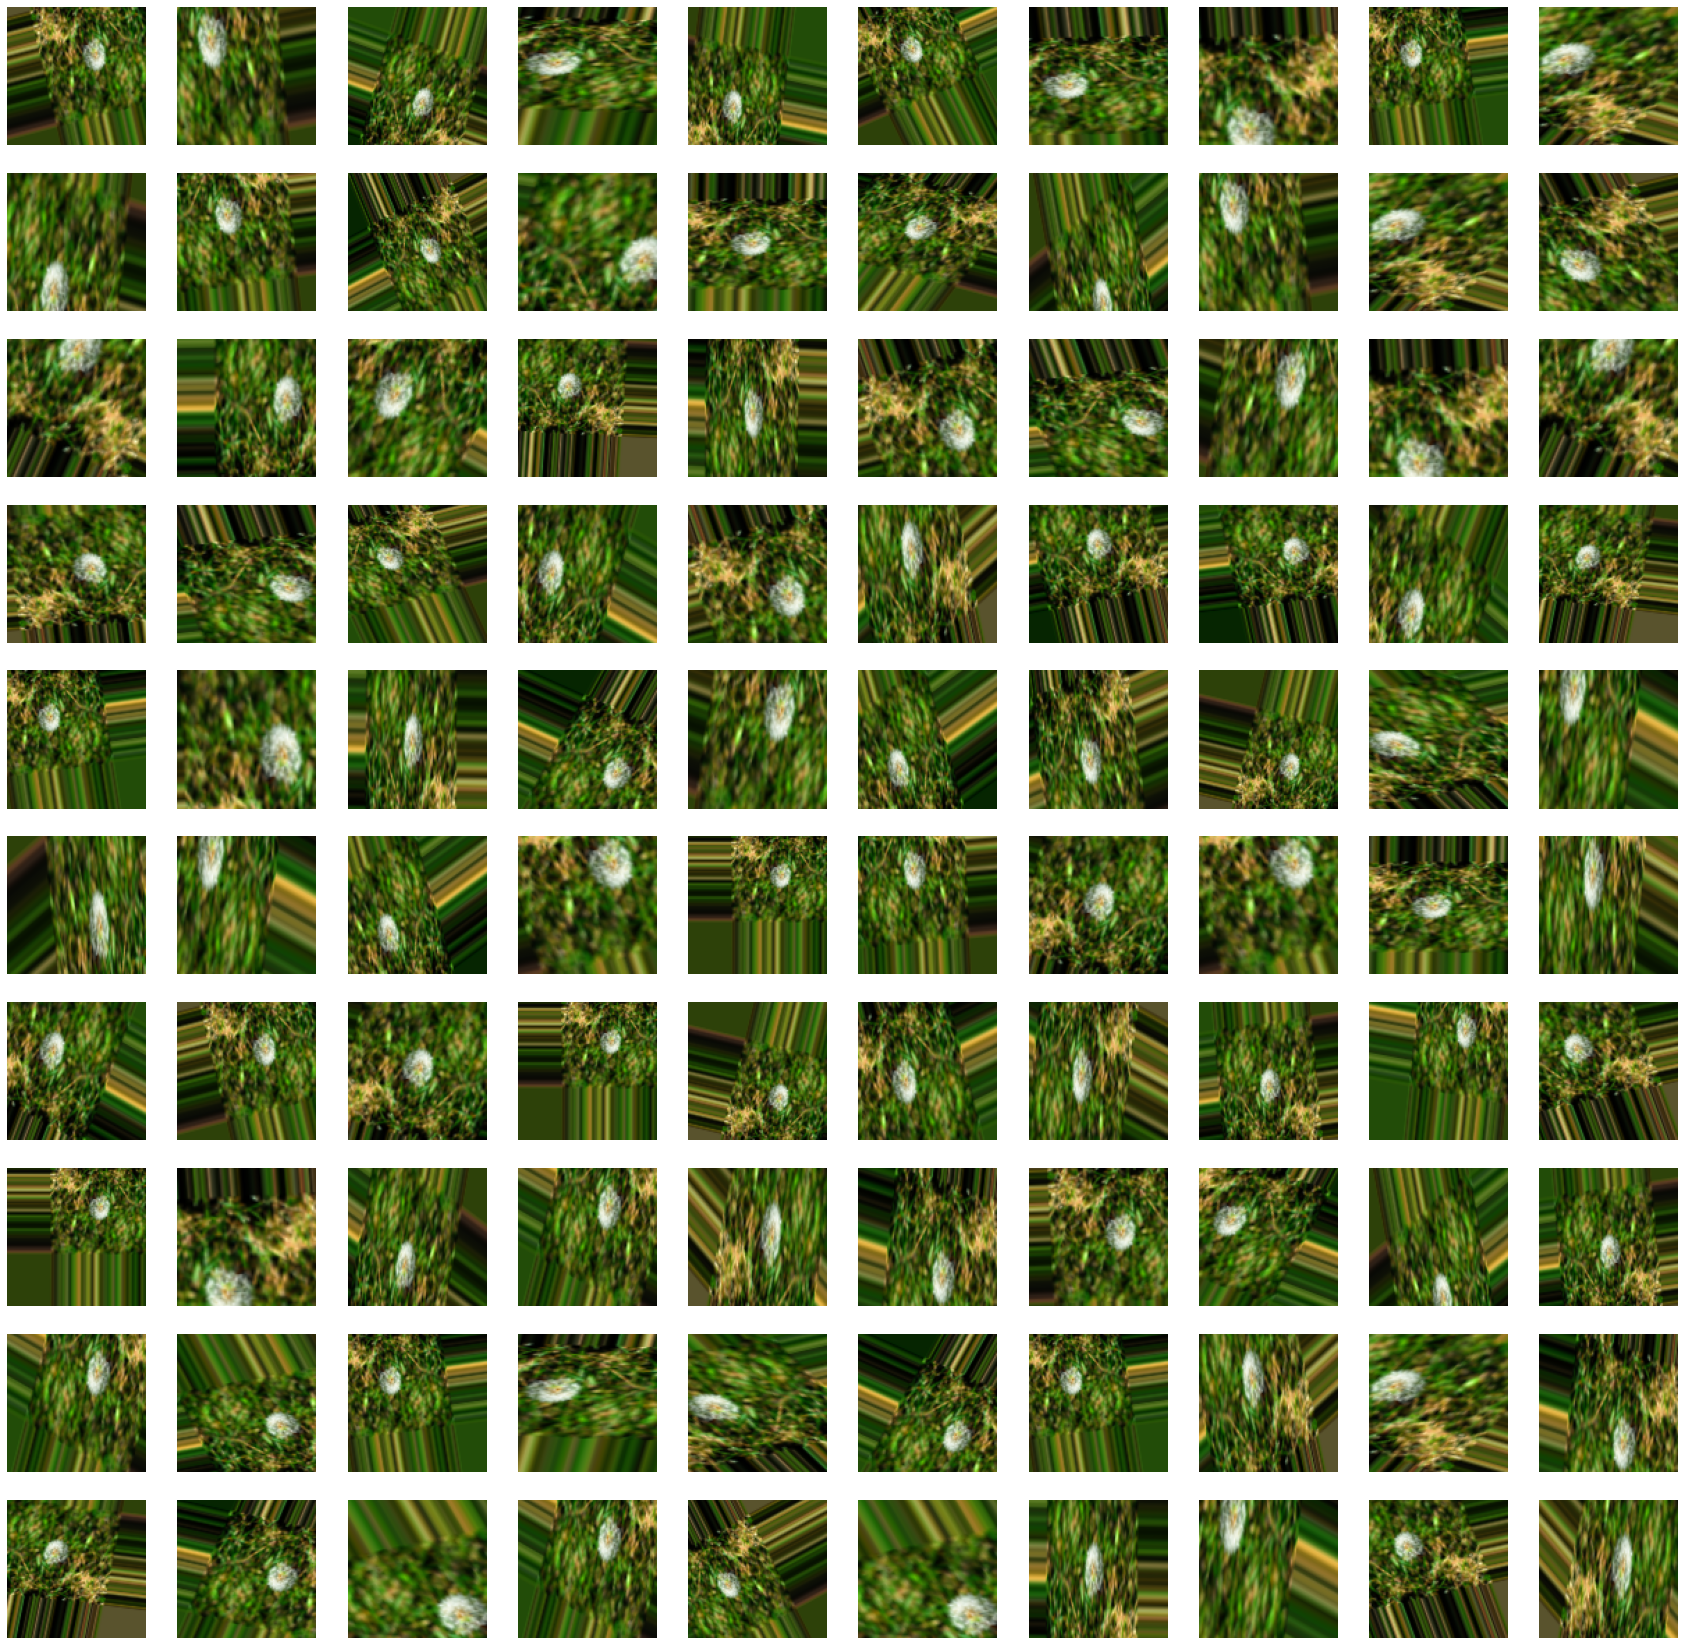

In [ ]:
# 증폭된 결과를 확인하기 위하여 시각화 처리 
plt.figure(figsize=(30, 30))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    i = np.random.choice(100, replace = False)
    plt.imshow(x_augment[i])
plt.show()

## 데이터의 증폭은 위와 같이 진행할 수 도 있고, GAN을 활용하여 진행할 수 도 있습니다. 

### 원본 데이터의 증폭

In [ ]:
image_generator = ImageDataGenerator(rotation_range = 50,
                                     zoom_range = 0.75,
                                     shear_range = 0.75,
                                     width_shift_range = 0.5, 
                                     height_shift_range=0.5,
                                     horizontal_flip = True, 
                                     vertical_flip = True)

In [ ]:
# 현재 데이터의 개수 
print(train_x.shape[0])

# 증폭 데이터의 개수 (50% 증폭)
augment_size = int(train_x.shape[0] * 0.5)
print(augment_size)

3453
1726


In [ ]:
x_choice = np.random.choice(train_x.shape[0], size = augment_size, replace = False)
print(x_choice[:10])
print(x_choice.shape)

# 복사본 데이터(독립변수)를 만들어 주는 과정
x_augmented = train_x[x_choice].copy()
print(x_augmented.shape)

# 복사본 데이터(종속변수)를 만들어 주는 과정
y_augmented = train_y[x_choice].copy()
print(y_augmented.shape)

[ 851  908 1794  279 2384 3342  886 1416  454  311]
(1726,)
(1726, 100, 100, 3)
(1726, 5)


In [ ]:
# 복사본 데이터(독립변수)를 증폭시켜주는 과정.
x_augmented = image_generator.flow(x_augmented, 
                                   np.zeros(augment_size),
                                   batch_size = augment_size,
                                   shuffle = False).next()[0]

In [ ]:
x_augmented.shape

(1726, 100, 100, 3)

In [ ]:
# 증폭된 데이터를 시각화 
plt.figure(figsize=(30,30))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    i = np.random.choice(1726, replace = False)
    plt.imshow(x_augmented[i])
plt.show()

## 원본데이터(train_x) 
## 증폭데이터(x_augmented)

## 하나로 합쳐주는 과정이 필요 

In [ ]:
train_x = np.concatenate((train_x, x_augmented))
train_y = np.concatenate((train_y, y_augmented))

print(train_x.shape)
print(train_y.shape)

(5179, 100, 100, 3)
(5179, 5)


## 전이학습(코렙이 아닌 개발도구를 권장합니다.)

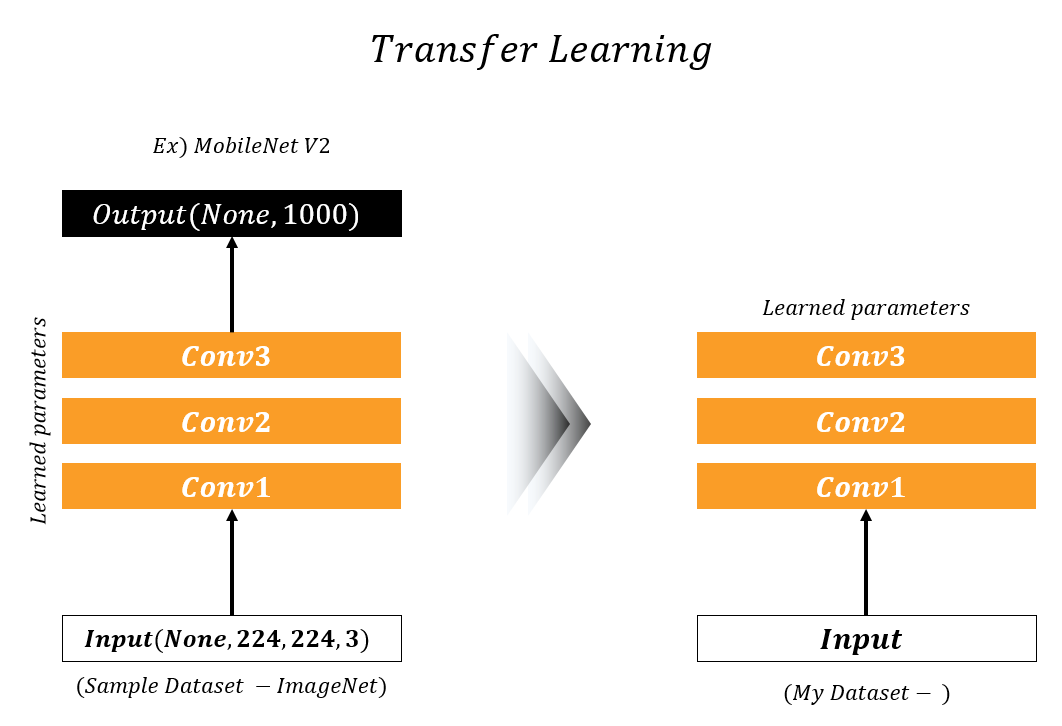

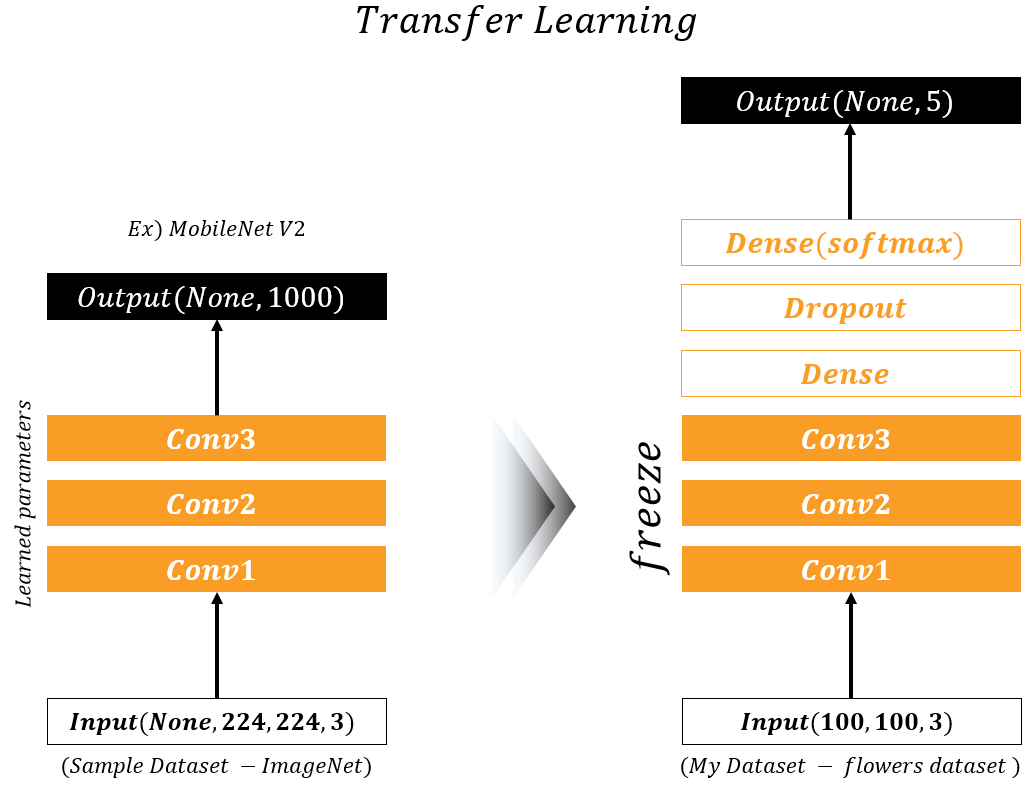

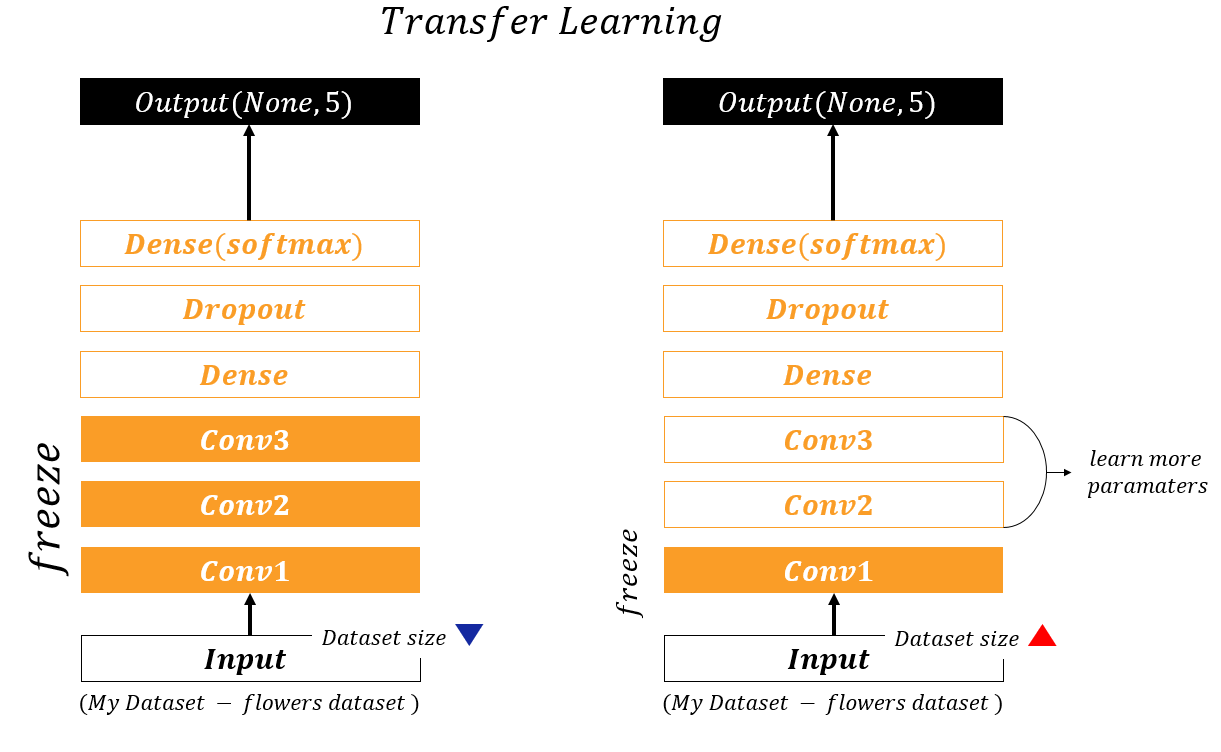

In [ ]:
# 미리 학습되어진 신경망 불러오기 

from tensorflow.keras.applications import MobileNetV2
#from tensorflow.keras.applications import VGG16
#from tensorflow.keras.applications import VGG19
#from tensorflow.keras.applications import Xception

# 함수형 방식의 신경망 구축 
from tensorflow.keras.layers import Input

In [ ]:
from tensorflow.keras.applications import VGG16

vgg16 = VGG16()
vgg16.summary()

In [ ]:
mobile_v2 = MobileNetV2()
mobile_v2.summary()

# 데이터를 받아오는 방법 1. 
https://www.kaggle.com/c/dog-breed-identification/data

# 데이터를 받아오는 방법 2. 
코드를 사용해 받아오는 방법.

In [ ]:
# 비추.....
tf.keras.utils.get_file('/content/labels.csv','http://bit.ly/2GDxsYS')
tf.keras.utils.get_file('/content/train.zip','http://bit.ly/31nIyel')
tf.keras.utils.get_file('/content/test.zip','http://bit.ly/2GHEsnO')

362856448/362841195 [==============================] - 4s 0us/step


'/content/test.zip'

In [ ]:
# 코렙 전용 코드 
!unzip train.zip
!unzip test.zip

# 오늘 사용할 라이브러리 

In [ ]:
#전이학습에서 사용하게 될 라이브러리들 입니다. 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 #openCV -> pip install opencv-python / pip install cv2
import os 
import csv

from PIL import Image

# 데이터 분석

In [ ]:
label_text = pd.read_csv('dataset/dogs/labels.csv')
print(label_text.head(6))
print(label_text.info())

# 종속변수의 범주의 수를 확인합니다. 

In [ ]:
label_text['breed'].nunique()

# 강아지 이미지와 견종을 동시에 출력하는 시각화 코드  

In [ ]:
# 사진당 크기 
plt.figure(figsize=(20,20))

# 총 16장의 사진을 출력 
for i in range(16):

    # 가로 4개 세로 4개씩 하여 이미지를 출력합니다.
    plt.subplot(4,4,i+1)

    # 무작위 값을 주어 매번 다른 이미지가 출력되도록 합니다.
    i = np.random.choice(10222)

    #label_text 변수에 loc를 사용하여 
    # [i번 째 행,'id' 라는 열] 의 값을 할당합니다.
    image_id = label_text.loc[i, 'id']

    #절대경로 설정을 활용하여 사진 출력
    # 이미지 
    plt.imshow(plt.imread('dataset/dogs/train/train/' + image_id + '.jpg'))

    #사진과 함께 번호(i) + 제목 ( loc[i,'breed'] ) 출력
    plt.title(str(i) + '-' + label_text.loc[i, 'breed'])

    # 축 정보 표기 x
    plt.axis('off')

plt.show()

# 전이학습. 
# 첫 번째. 가지고온 신경망의 모든 계층의 파라미터를 초기화 하고, 모든 계층을 다시 학습.(학습 시키지 않을것입니다. 학습 시간대비 부족한 성능)

# 두 번째. 가지고온 신경명의 절반의 계층을 학습시켜주도록 합니다. (학습 o)

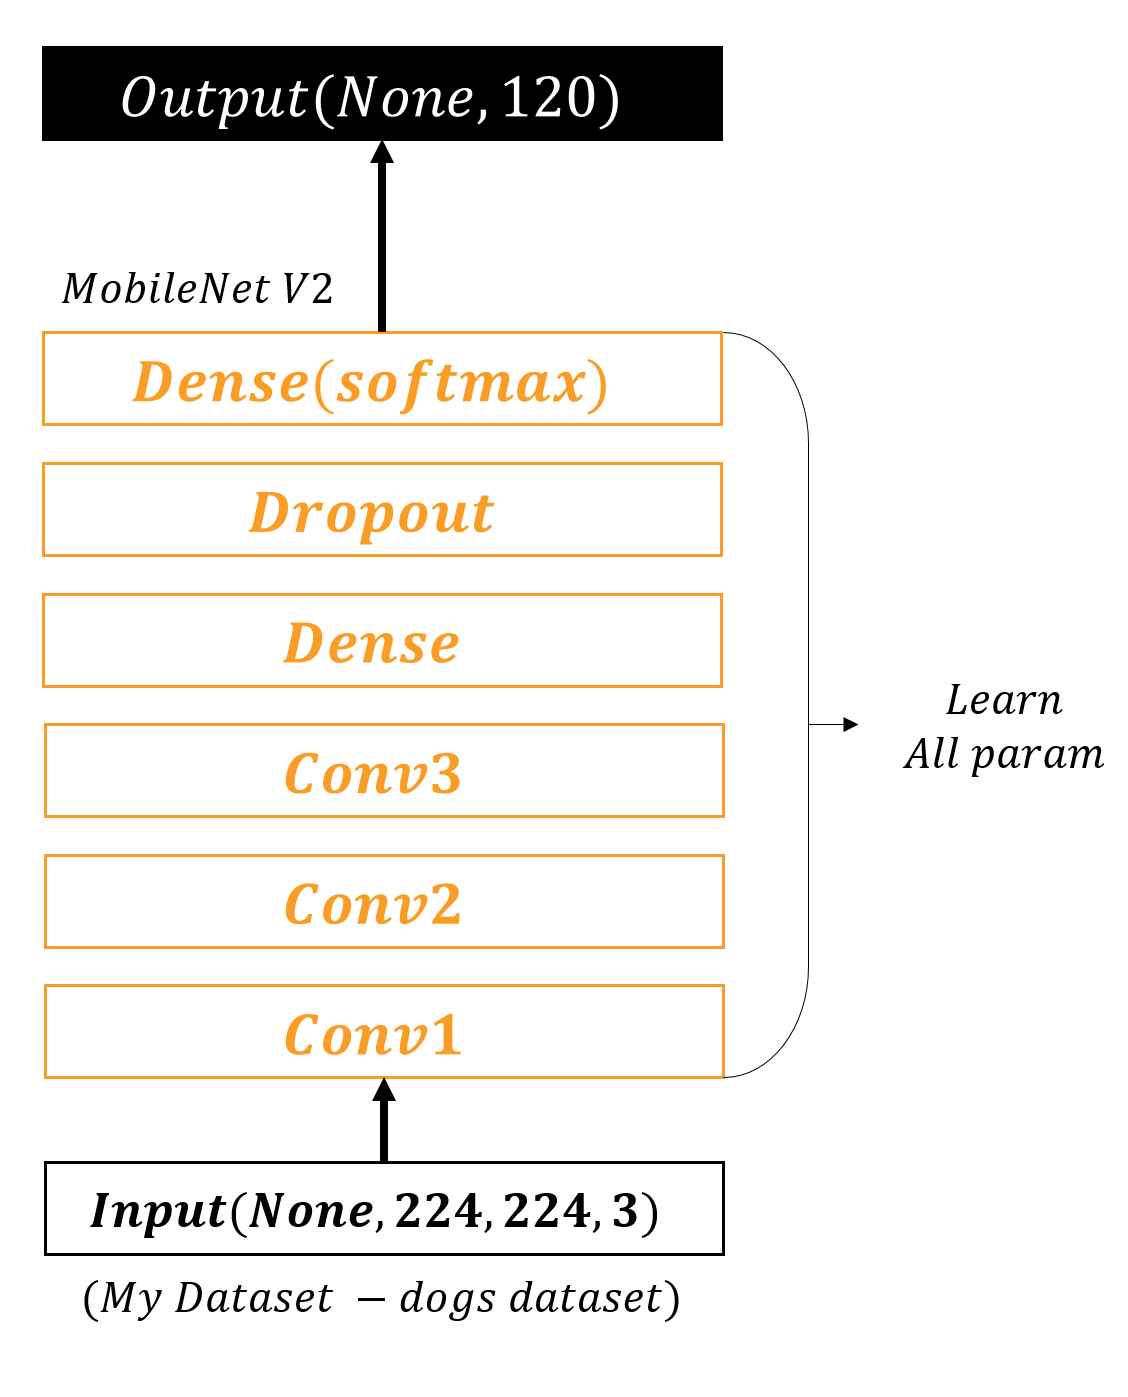

In [ ]:
# 첫 번째 실험을 위한 모바일넷 신경망 불러오기  
mobile_v2 = MobileNetV2()

In [ ]:
# 계층의 학습을 제어하는 과정.
for layer in mobile_v2.layers[:-1]:
    layer.trainable = True

In [ ]:
# 계층에 있는 파라미터를 초기화 해주는 과정 

for layer in mobile_v2.layers[:-1]:
    if 'kernel' in layer.__dict__:

        # kernel의 shape값을 얻어내는 과정 
        kernel_shape = np.array(layer.get_weights()).shape

        # 파라미터 초기화 과정 
        layer.set_weights(np.random.normal(0,1,kernel_shape))

# 독립변수를 정의하고,
# 이미지 크기를 224,224로 통일
# 이미지 정규화 과정 

In [ ]:
train_X = []

for i in range(len(label_text)): # 모든 이미지만큼 반복 수행
    #이미지 읽어들이기
    img = cv2.imread('dataset/dogs/train/train/' + label_text['id'][i] + '.jpg')
    img = cv2.resize(img, dsize=(224, 224)) # 이미지 크기 통일
    
    img = img / 255.0 # 이미지 크기 최소-최대 정규화
    #(이미지 크기 축소)
    
    train_X.append(img) # 빈 리스트에 학습 데이터 생성

train_X = np.array(train_X) # 학습 데이터를 array 타입으로 전환 

# 얻어진 학습 데이터의 shape 확인 
print(train_X.shape)

# 종속변수를 만들어 주는 과정 (train_Y)

In [ ]:
unique_Y = label_text['breed'].unique().tolist()
print(unique_Y)

unique_Y.index('dingo')

In [ ]:
train_y = [unique_Y.index(breed) for breed in label_text['breed']]

train_y = np.array(train_y)

print(train_y)

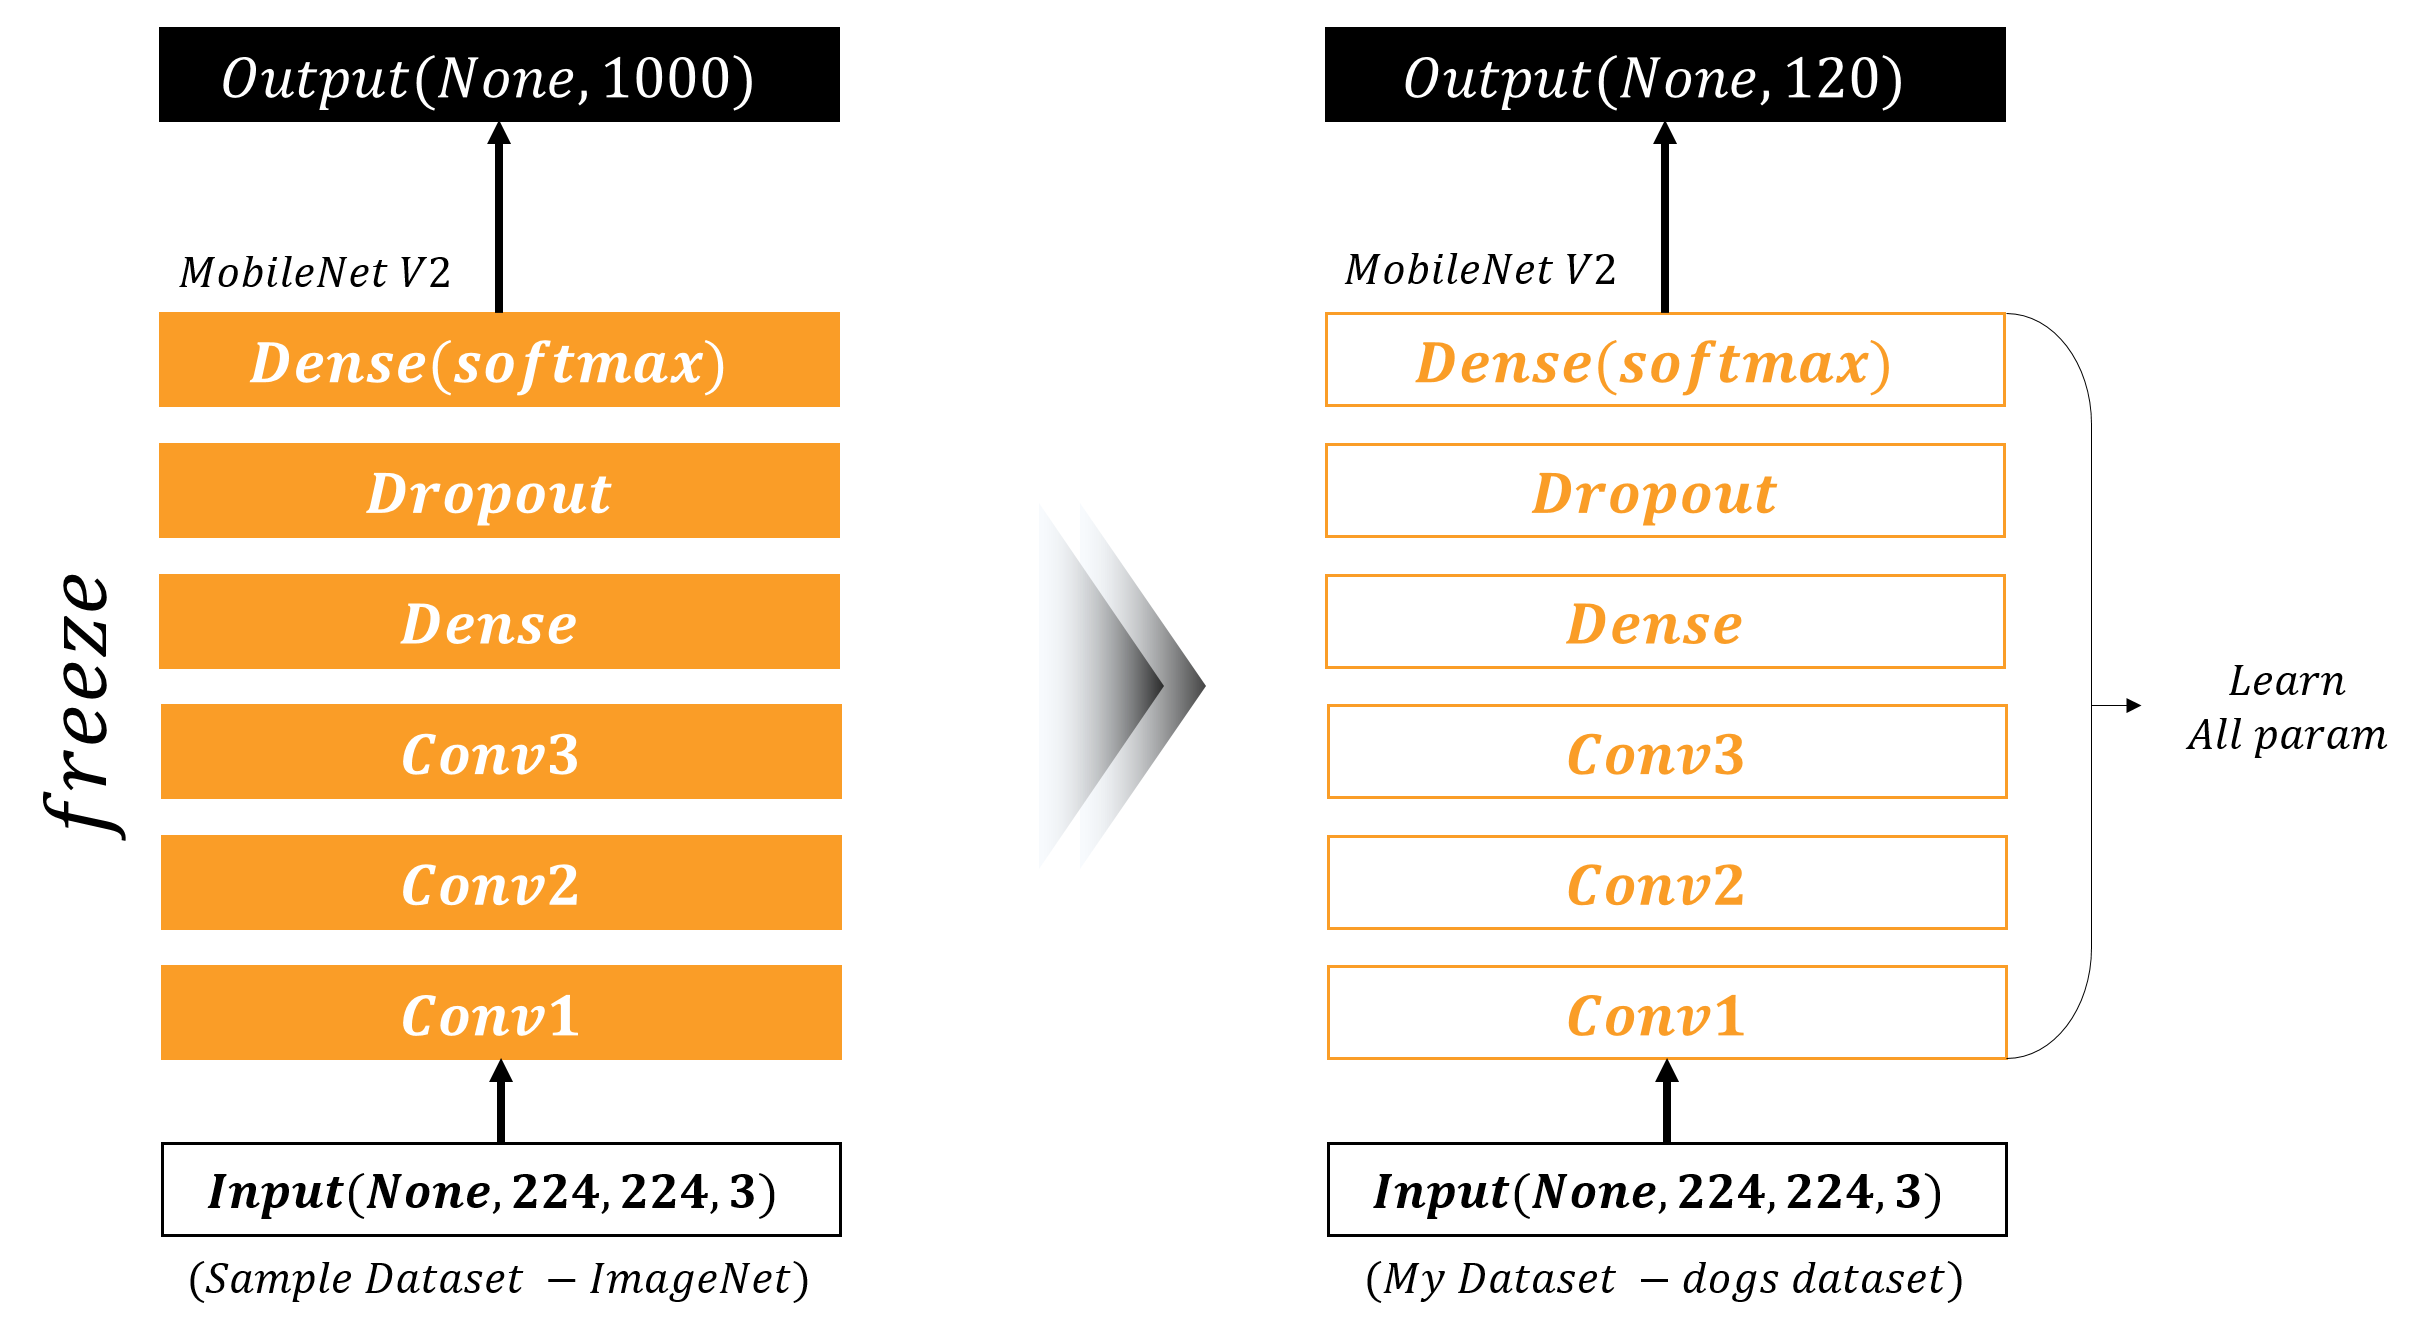

# 나의 문제에 맞는 출력 계층 만들기

In [ ]:
# 마지막 계층의 이전계층을 변수화 한 과정
output_layer_2 = mobile_v2.layers[-2].output

# 출력 계층 정의
predictions = tf.keras.layers.Dense(units=120, activation='softmax')(output_layer_2)

# 함수형 방식으로 신경망 구축 
model = tf.keras.Model(inputs = mobile_v2.input, outputs = predictions)
model.summary()

# 컴파일 과정 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 텐서보드를 위한 log 폴더가 필요.

In [ ]:
os.makedirs('/content/log/')
log_dir = '/content/log/'

# 학습 코드(조기중단, 텐서보드)
# 코드 돌리지 마세요! 속도가 너무 느리고, 성능이 다소 아쉽습니다. 

In [ ]:
history = model.fit(train_X, train_Y, 
                    epochs = 10,
                    batch_size =32,
                    validation_split = 0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=5),
                                 tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq = 1)])


# 두 번째 실험 
# 절반의 계층만 내가 가진 데이터로 학습을 시켜주느 과정  

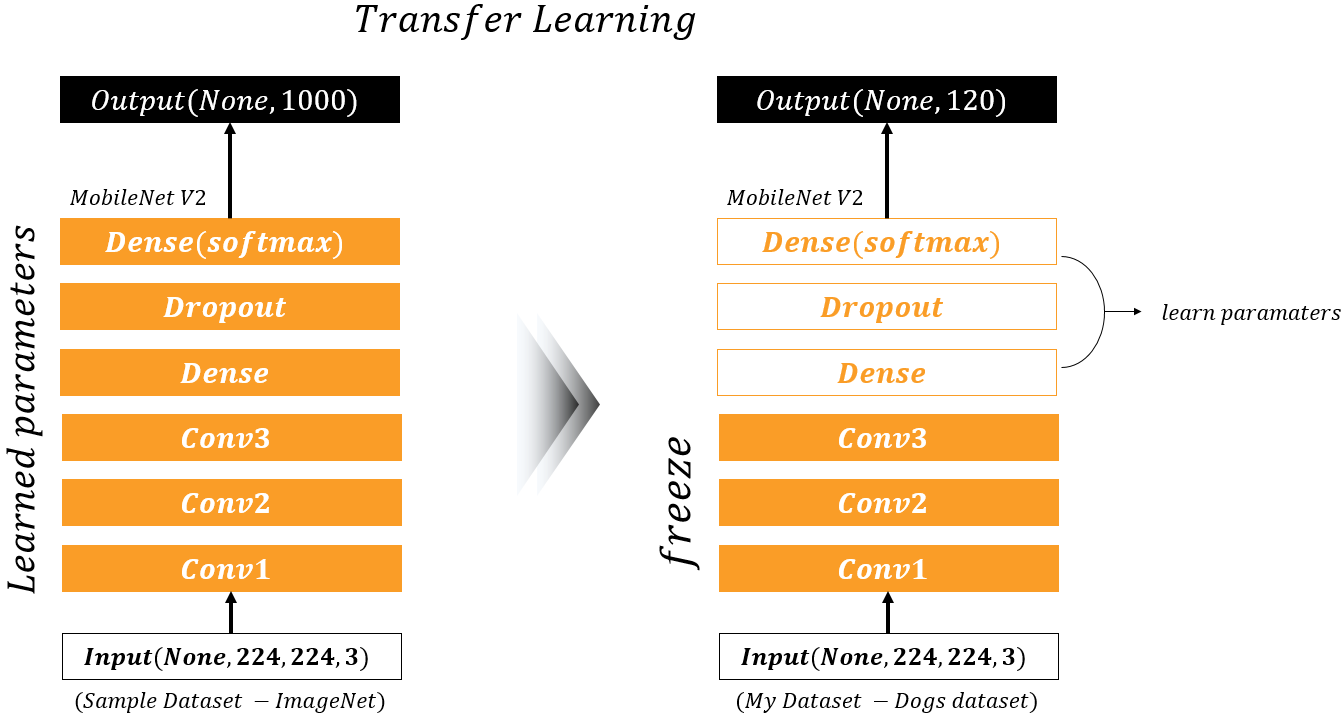

In [ ]:
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf

mobilev2        = MobileNetV2()
output_layer_2  = mobilev2.layers[-2].output
predictions     = tf.keras.layers.Dense(120, activation='softmax')(output_layer_2)

model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)
#model.summary()

# 절반의 계층만 학습을 시켜 준다! 

In [ ]:
for layer in model.layers[:-20]:
    layer.trainable = False

for layer in model.layers[-20:]:
    layer.trainable = True

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_X, train_Y, 
                    epochs = 10,
                    batch_size =32,
                    validation_split = 0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=5),
                                 tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq = 1)])

# 학습이 모두 완료되었다는 가정하에 텐서보드 실행 방법

1. 아나콘다 프롬프트로 접근합니다. 

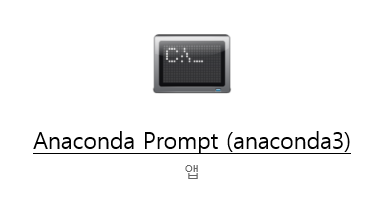

2. 현재 사용하고 있는 가상 환경으로 접근하세요.
 - conda activate [가상환경이름]

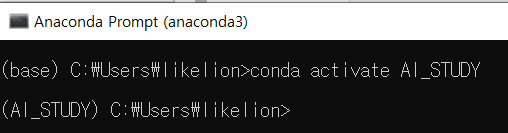

3. tensorborad 실행을 위한 코드 입력.
- tensorboard --logdir=C:\Users\likelion\AI_STUDY\dataset\dogs\log
- 주의하실점은 여러분들이 만들어 주신 log 폴더까지의 경로로 입력

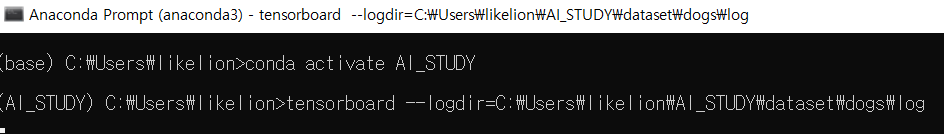

4. 접근 가능한 로컬 호스트를 웹 브라우저에 입력 

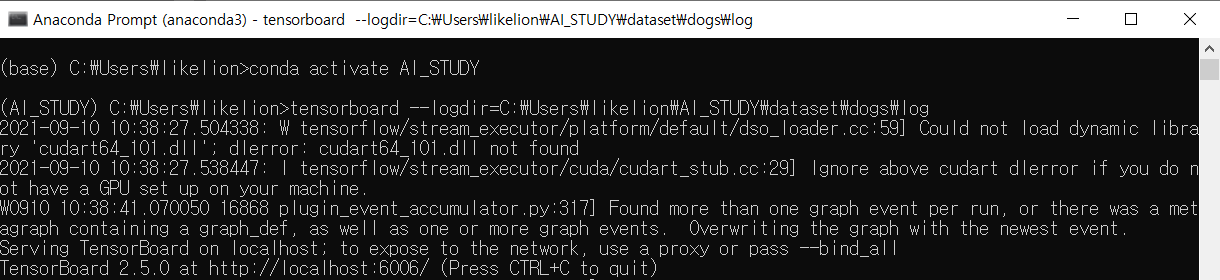

In [ ]:
img = plt.imread('dataset/dogs/test/test/001510bc8570bbeee98c8d80c8a95ec1.jpg')
img = np.resize(img,(224,224,3))
img = img / 255.0
img = np.expand_dims(img, axis=0)

prob = model.predict(img)

print("Predict Prob : \n",np.round(prob * 100,1))
plt.imshow(plt.imread('dataset/dogs/test/test/001510bc8570bbeee98c8d80c8a95ec1.jpg'))
print("Model Predict : Index-{}".format(np.argmax(prob)))